# Stock Market Analysis and Prediction using Long Short Term Memory (LSTM)

### Installing the required Modules

In [ ]:
# installing the yfinance modular
%pip install -q yfinance

In [ ]:
# installing the seaborn
%pip install seaborn

In [ ]:
# installing the pandas
%pip install pandas

In [ ]:
# installing the numpy
%pip install numpy

### Describing the Dataset

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON


### Descriptive Statistics about the Data

In [11]:
# Describing the Apple Data
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.100239,181.566270,178.781984,180.284762,179.792270,5.757445e+07
std,10.335482,10.165879,10.247536,10.158716,10.269515,1.722444e+07
min,152.160004,156.460007,151.639999,155.000000,154.177048,2.404830e+07
25%,172.985001,174.172504,171.645004,173.172497,172.645988,4.678918e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048981,5.340815e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879902,6.392830e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [12]:
# Describing the Google Data
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,129.180254,130.642203,128.036032,129.393631,129.393631,2.384700e+07
std,12.948456,12.865344,12.902426,12.857608,12.857608,9.084036e+06
min,96.570000,101.610001,95.870003,101.070000,101.070000,8.828600e+06
25%,122.011501,123.857502,121.439999,122.787500,122.787500,1.816445e+07
50%,131.885002,133.404999,130.720001,131.870003,131.870003,2.148430e+07
75%,138.592499,139.954998,137.547497,138.734997,138.734997,2.647855e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,7.614030e+07


In [13]:
# Describing the Microsoft Data
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,344.593690,347.657858,341.569286,344.820715,343.428740,2.600006e+07
std,38.541607,38.521168,38.343658,38.544162,39.173035,9.985251e+06
min,265.209991,275.000000,263.279999,272.230011,270.013916,1.017660e+07
25%,320.734993,323.737495,317.767509,320.950005,319.236580,2.044012e+07
50%,334.899994,337.845001,332.360001,335.224991,333.222931,2.347445e+07
75%,373.557503,375.375008,370.477493,374.265007,373.574173,2.783138e+07
max,420.559998,427.820007,417.989990,425.220001,425.220001,7.847820e+07


In [14]:
# Describing the Amazon Data
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,135.274603,136.833214,133.829088,135.418333,135.418333,5.397182e+07
std,20.841658,20.896110,20.824988,20.905277,20.905277,1.903676e+07
min,95.750000,98.300003,95.610001,97.239998,97.239998,2.237840e+07
25%,124.957500,126.767500,123.947502,125.267502,125.267502,4.276405e+07
50%,133.760002,134.964996,132.455002,133.619995,133.619995,4.979670e+07
75%,147.542500,148.742504,145.655003,147.434998,147.434998,5.984152e+07
max,177.690002,180.139999,177.490005,178.750000,178.750000,1.529387e+08


### Information About the Data

In [15]:
# Apple information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-16 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [16]:
# Google Information
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-16 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
# Microsoft Information
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-16 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [18]:
# Amazonr Information
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-16 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


### Closing Price

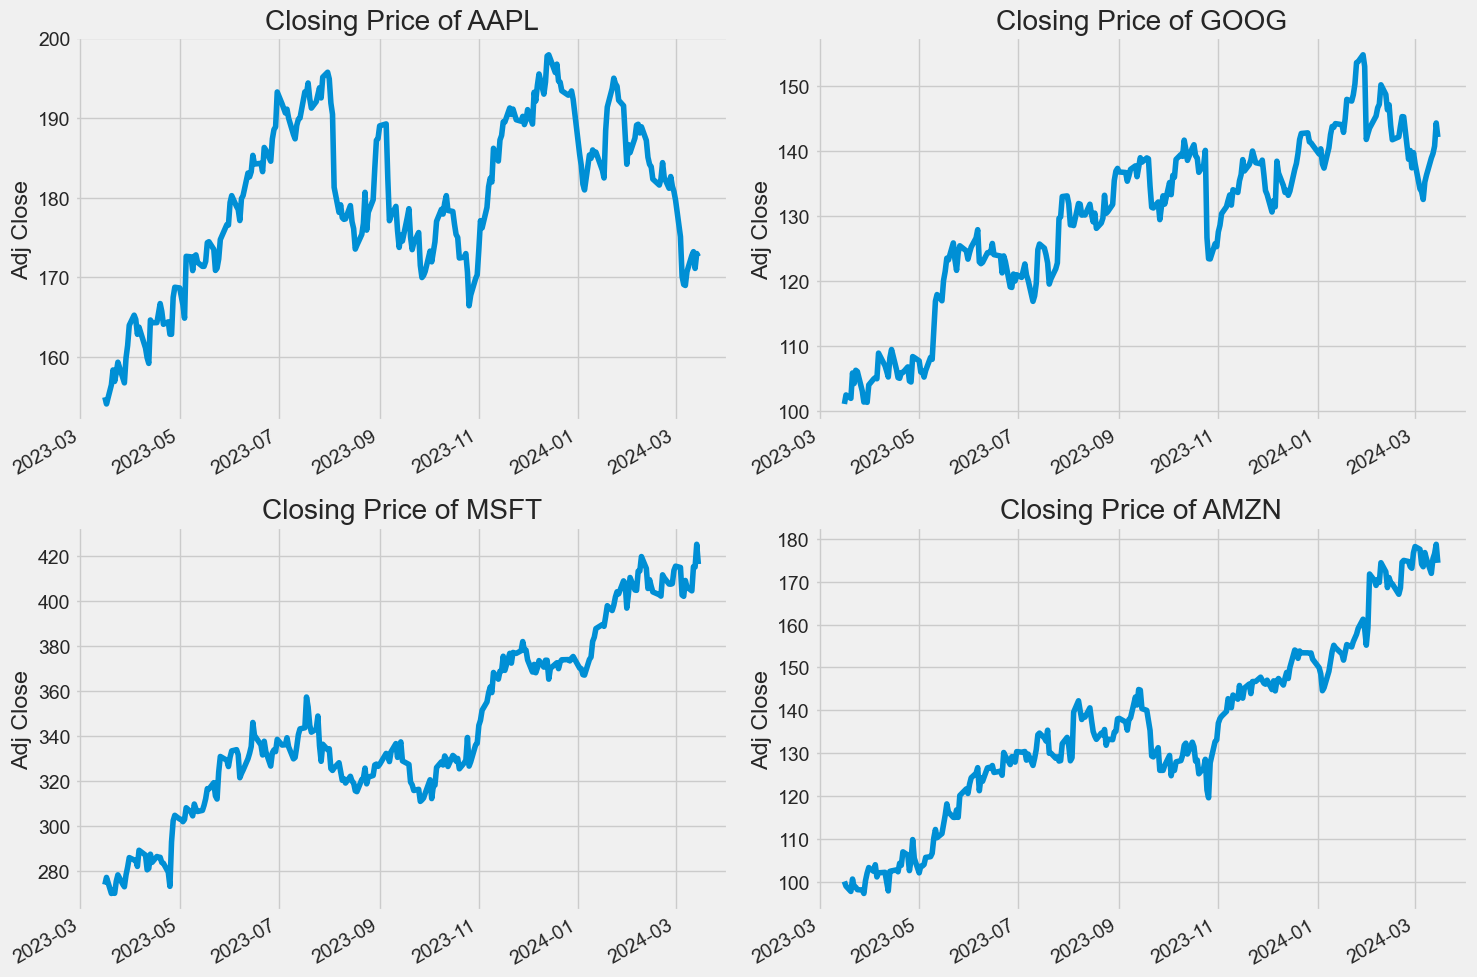

In [19]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()